To gain insights into the dataset, the rate and structural distribution of the compounds is analyzed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import colorsys
from rdkit import Chem

# Doyle colors
doyle_colors = ["#CE4C6F", "#1561C2", "#188F9D","#C4ADA2","#515798", "#CB7D85", "#A9A9A9"]
# extension of palette with lighter and darker versions
def adjust_lightness(color, factor=1.2):
    """
    Function to make colors lighter (factor > 1) or darker (factor < 1).
    """
    r, g, b = mcolors.to_rgb(color)
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    l = max(0, min(1, l * factor))
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    return mcolors.to_hex((r, g, b))

lighter = [adjust_lightness(c, 1.2) for c in doyle_colors]
darker  = [adjust_lightness(c, 0.7) for c in doyle_colors]
all_colors = doyle_colors + darker + lighter

# Save the categorical colormap
cat_cmap = ListedColormap(all_colors, name="Doyle_cat")
plt.colormaps.register(cat_cmap)

# Define and save a continuous colormap
colors = [doyle_colors[1],"#FFFFFFD1",doyle_colors[0]]
cont_cmap = LinearSegmentedColormap.from_list("Doyle_cont", colors)
plt.colormaps.register(cont_cmap)

# General plt parameters
plt.rcParams.update({
    "axes.titlesize": 20,        # Subplot title
    "axes.labelsize": 16,        # X and Y labels
    "figure.titlesize": 24,      # Suptitle
    "xtick.labelsize": 14,       # X tick labels
    "ytick.labelsize": 14,       # Y tick labels
    "legend.fontsize": 14,       # Legend text
    "legend.title_fontsize": 14  # Legend titles
})

In [2]:
# Read in the dataset.
df_data = pd.read_csv("./Datasets/Datasets_Initial_Trends/ArI_data_dft_unfiltered.csv",index_col=0,header=0)
df_data

,E,ES_root_dipole,ES_root_electronic_spatial_extent,ES_root_molar_volume,E_thermal_correction,dipole,electronegativity,hardness,homo_energy,lumo_energy,...,C1_NPA_core,C1_VBur,I1_APT_charge,I1_ES_root_Mulliken_charge,I1_ES_root_NPA_Rydberg,I1_Mulliken_charge,I1_NMR_anisotropy,I1_NMR_shift,I1_NPA_Rydberg,rate
can,,,,,,,,,,,,,,,,,,,,,
BrC(C1=CC=CC=C1)C1=C(I)C=CC=C1,-3083.409647,6.077454,4469.772773,2208.516776,0.204053,2.896666,0.151605,0.102999,-0.254604,-0.048605,...,1.998575,0.684494,-0.245984,0.030756,0.023560,0.166294,25.078182,45.940478,0.005062,0.380
BrC1=C(Br)C=C(I)C(I)=C1,-5394.777171,3.865000,4607.800100,2190.935000,0.070125,0.508900,0.163780,0.091740,-0.255520,-0.072040,...,1.998440,0.659220,-0.163304,0.128276,0.012030,0.229804,31.721800,42.336500,0.005670,1.642
BrC1=C(Br)C=C(I)C=C1,-5383.980108,3.747700,3374.479800,1640.746500,0.079239,1.864850,0.150375,0.103035,-0.253410,-0.047340,...,1.998640,0.626495,-0.239397,0.045092,0.021600,0.186868,30.260200,44.524200,0.005490,1.705
BrC1=C(C(I)=CC=C1)N(=O)=O,-3017.699502,10.083700,2720.740800,1308.332000,0.093188,6.118700,0.177595,0.089005,-0.266600,-0.088590,...,1.998550,0.667873,-0.138246,0.361878,0.005620,0.257586,29.073500,44.383900,0.005830,2.102
BrC1=C(C=C(I)C=C1)C#N,-2905.530892,9.711400,3016.506300,1086.079000,0.088288,5.483600,0.164570,0.095110,-0.259680,-0.069460,...,1.998640,0.625865,-0.211125,0.465694,0.003700,0.206043,30.135100,44.193300,0.005550,2.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[H][C@@](N)(CC1=CC(I)=C(O)C(I)=C1)C(O)=O,-650.953437,7.990089,4222.277192,1772.392994,0.189950,8.669840,0.149822,0.092863,-0.242685,-0.056958,...,1.998610,0.652221,-0.214697,0.054925,0.011051,0.186261,27.556612,45.988270,0.005590,0.658
[H][C@@](N)(CC1=CC=C(O)C(I)=C1)C(O)=O,-640.150015,12.061152,3834.769540,1897.940470,0.198844,6.120974,0.137038,0.099380,-0.236418,-0.037658,...,1.998607,0.653036,-0.252861,-0.241201,0.017996,0.168849,24.051568,48.355636,0.005275,0.403
[H][C@](N)(CC1=CC(I)=C(O)C=C1)C(=O)OC,-679.382348,9.286185,4125.583810,2070.385368,0.228532,2.724513,0.133983,0.099678,-0.233661,-0.034304,...,1.998600,0.665874,-0.240197,-0.245372,0.018915,0.162887,24.513972,47.989547,0.005365,0.351


## Rate data

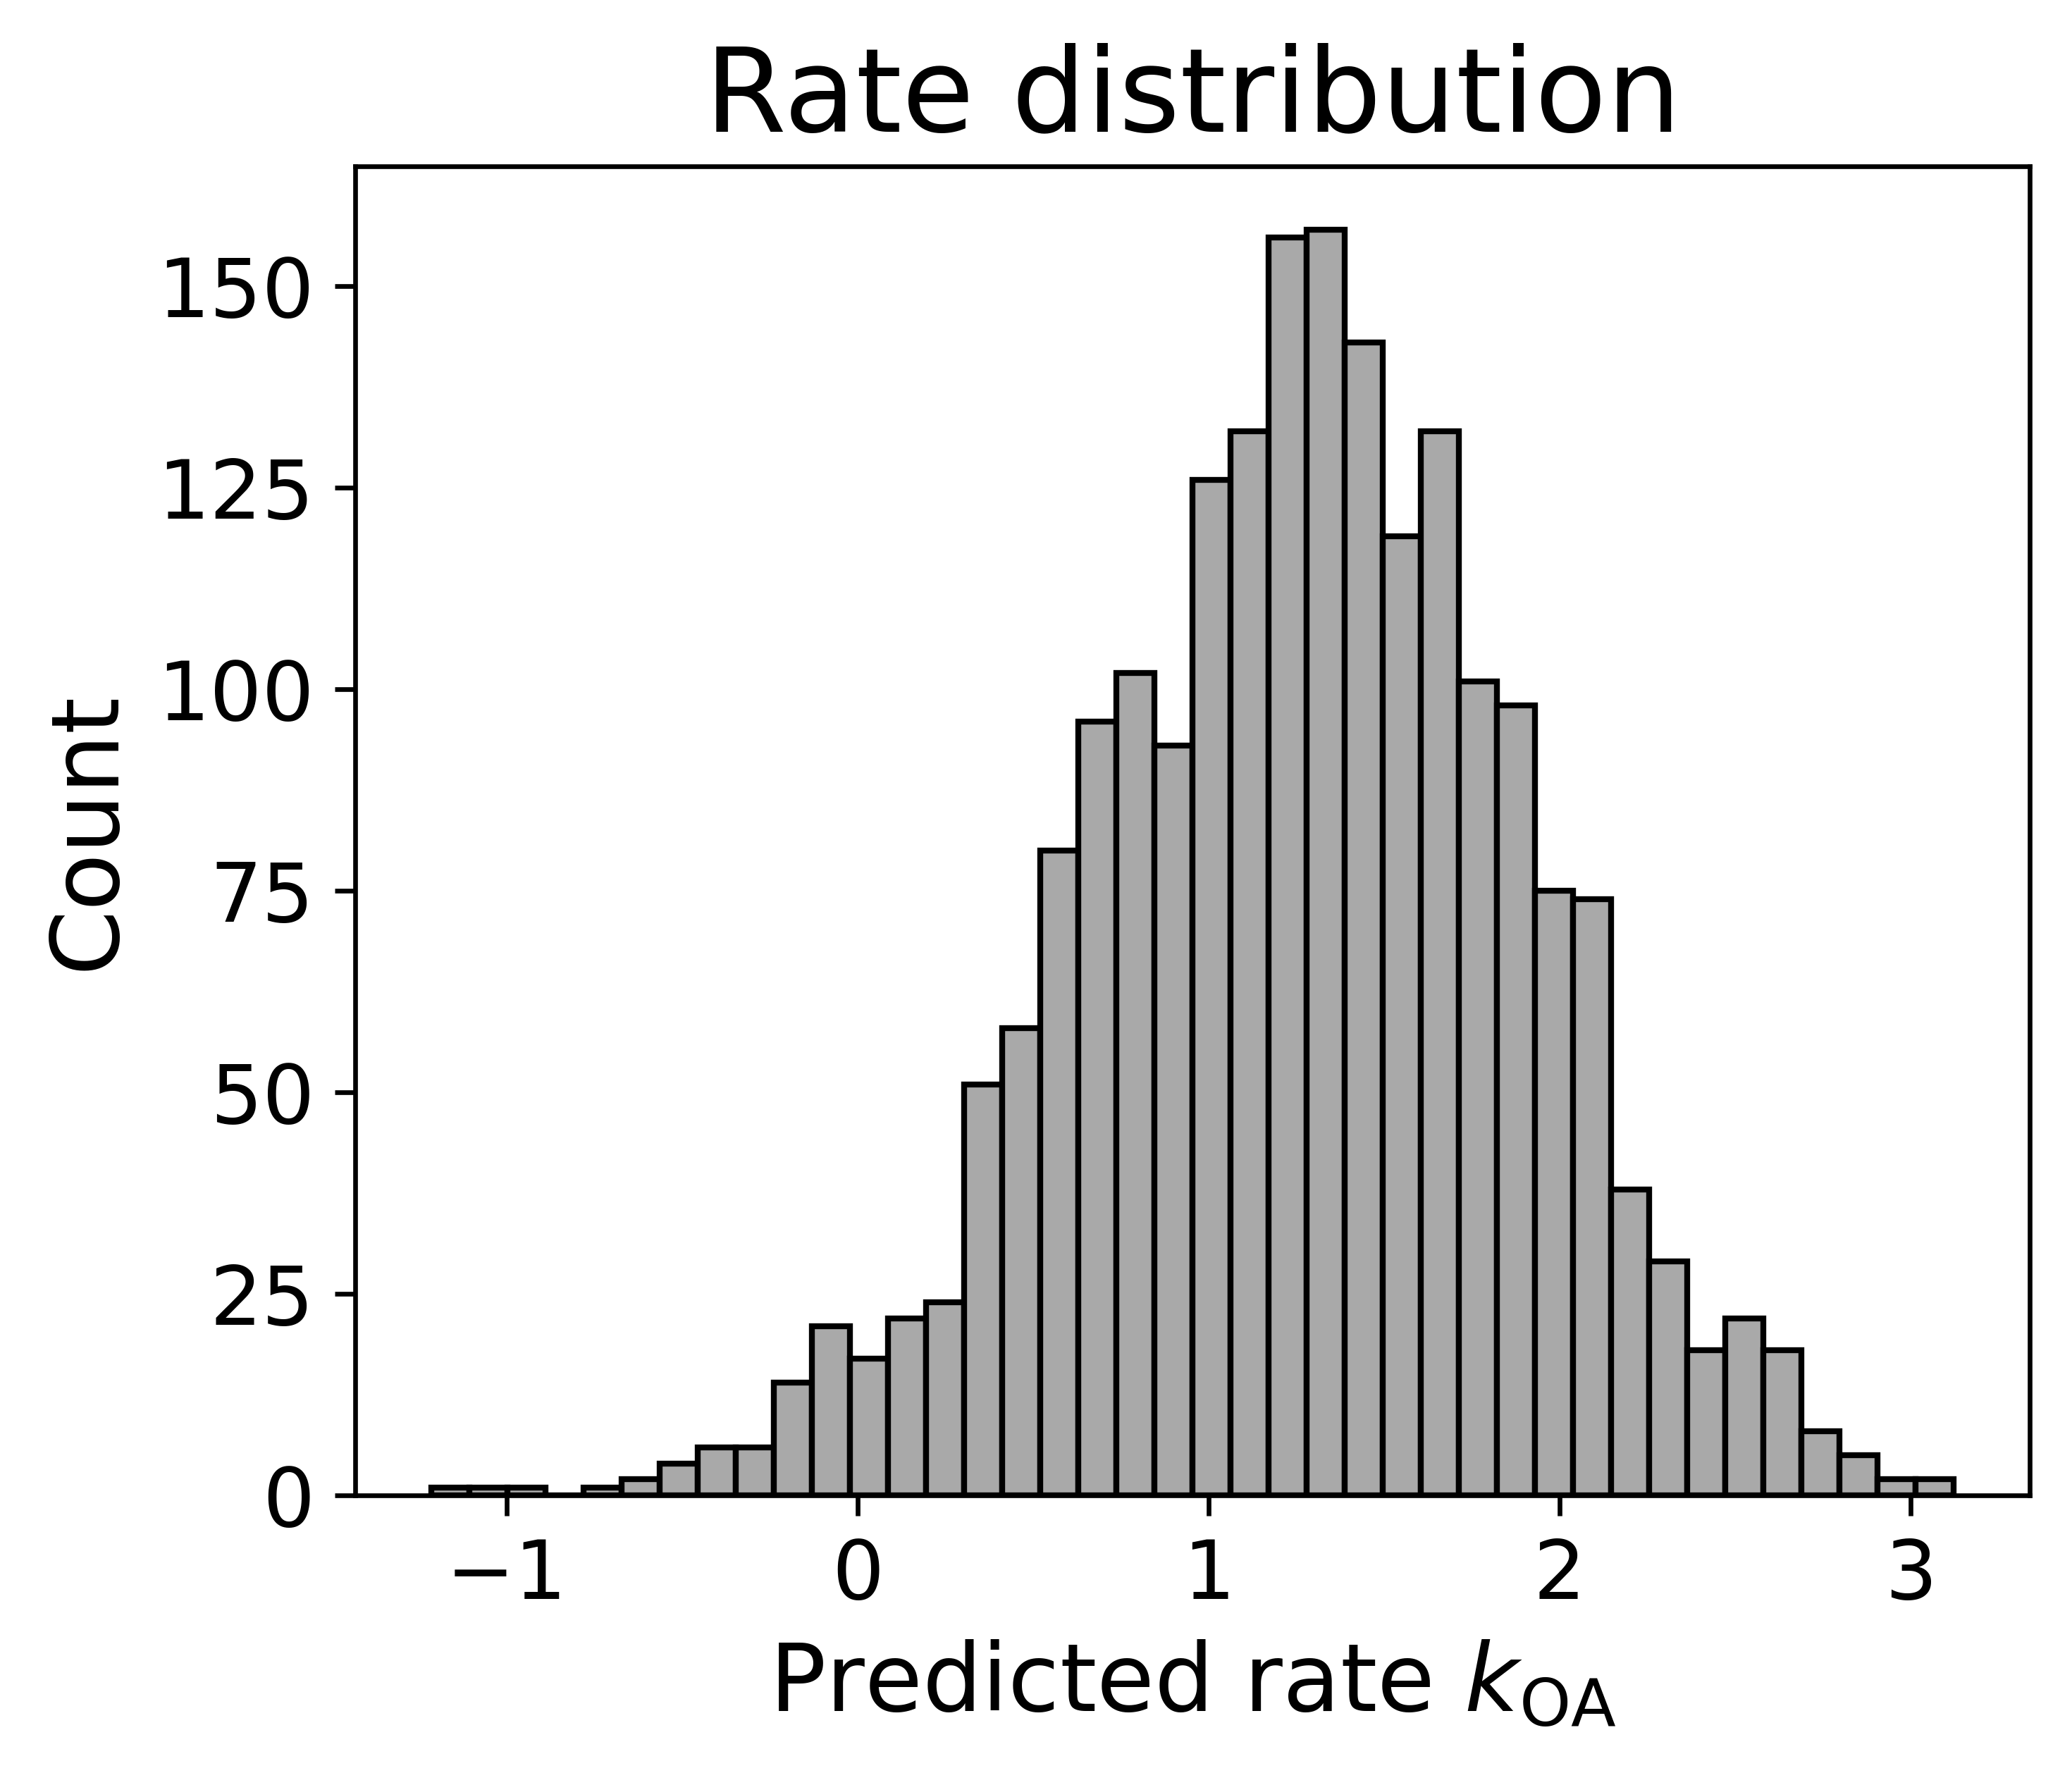

Mean rate: 1.2725654501216546
Median rate: 1.288
Highest rate: 3.123
Lowest rate: -1.214


In [3]:
def hist_plot(data, column,label,print_labels=True, figsize=(5,4)):
    hist_color = "#dfdfdf"
    plt.figure(figsize=figsize,dpi=600)
    plt.hist(data[column], color=all_colors[6], bins=40, edgecolor="k")
    if print_labels:
        plt.xlabel(label)
        plt.ylabel("Count")
    else:
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()

hist_plot(df_data,"rate",r"Predicted rate $\mathit{k}_{\mathrm{OA}}$")    
plt.title("Rate distribution")
plt.show()

print(f'Mean rate: {df_data["rate"].mean()}')
print(f'Median rate: {df_data["rate"].median()}')
print(f'Highest rate: {df_data["rate"].max()}')
print(f'Lowest rate: {df_data["rate"].min()}')

The rate data is approximately normally distributed.

## Distribution of electronic features

In [4]:
def draw_molecules(smiles_list):
    mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    # Generate 2D coordinates for all mols
    for mol in mol_list:
        AllChem.Compute2DCoords(mol)

    # Draw the aligned molecules
    depiction = Draw.MolsToGridImage(
        mol_list,
        molsPerRow=len(mol_list),
        subImgSize=(250, 250),
        legends=[smiles for smiles in smiles_list]
        )
    display(depiction)

### Charge at the ipso-carbon of the aryl iodide

Analysis of the NPA charge on the ipso-carbon of the iodoarenes:

Mean charge at the ipso-carbon: -0.247
Median charge at the ipso-carbon: -0.237
Highest charge at the ipso-carbon: -0.167
Lowest charge at the ipso-carbon: -0.441


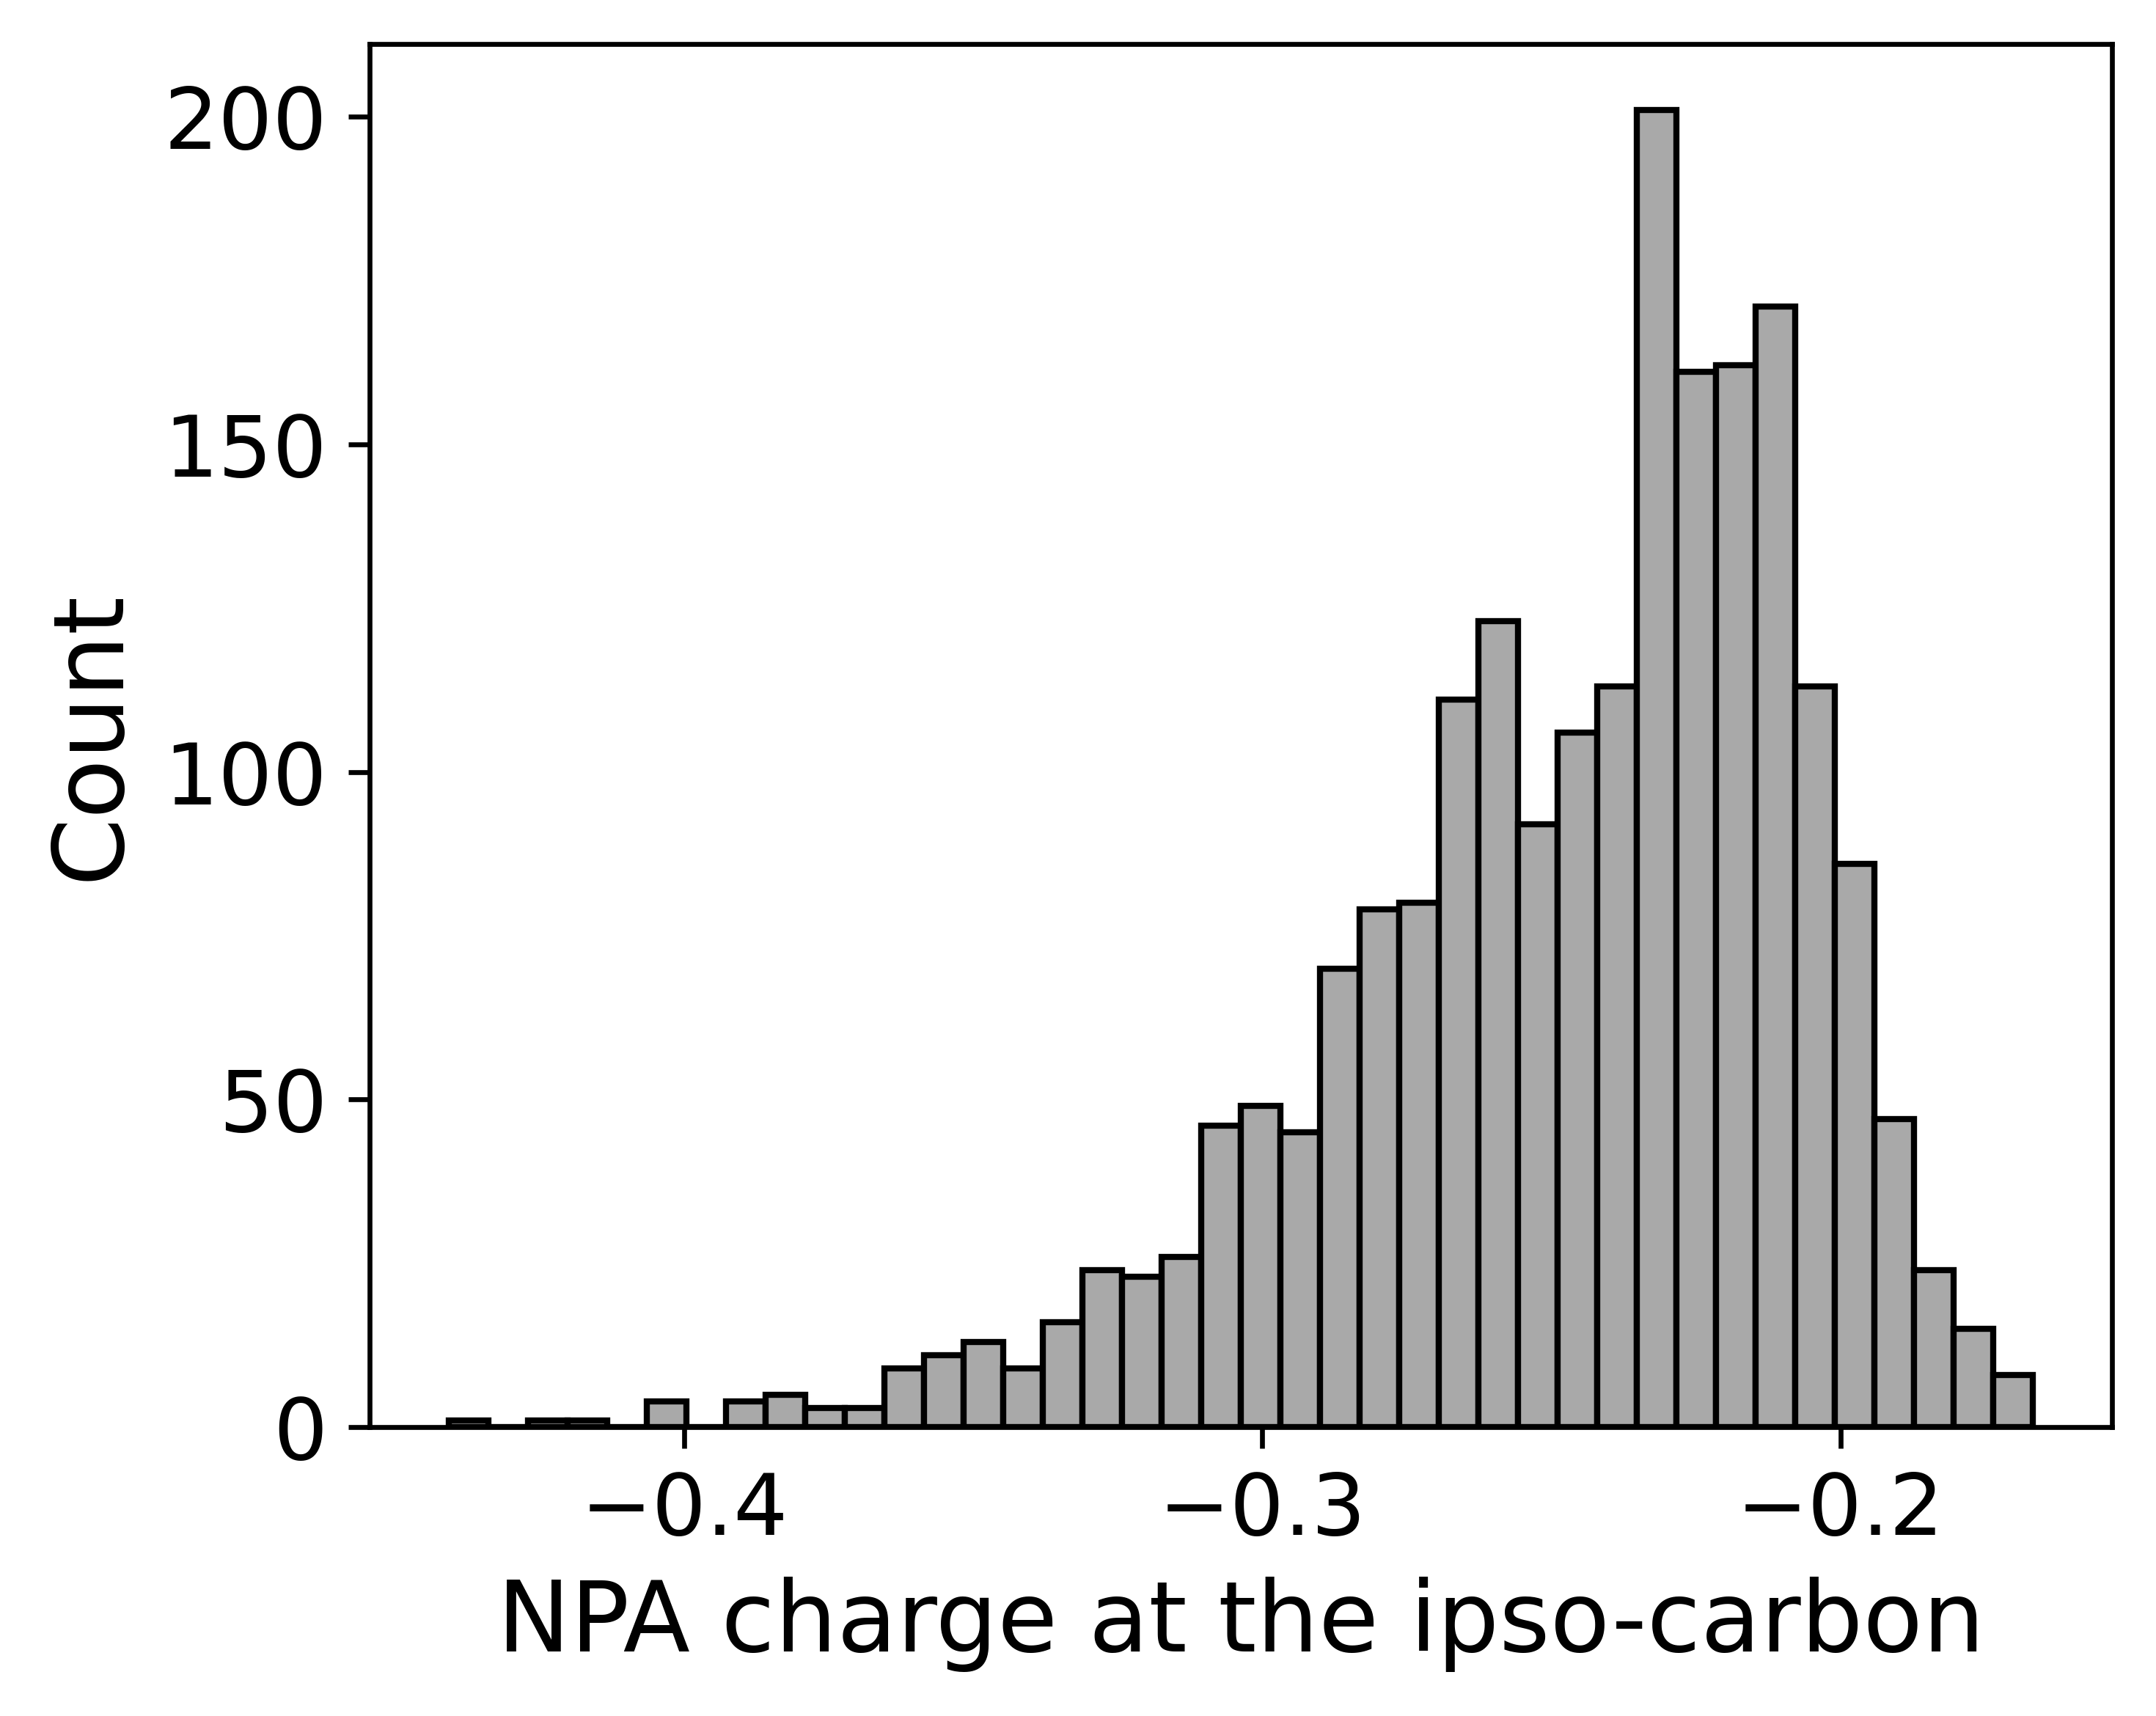

In [5]:
print("Analysis of the NPA charge on the ipso-carbon of the iodoarenes:")
print("")
print(f'Mean charge at the ipso-carbon: {round(df_data["C1_NPA_charge"].mean(),3)}')
print(f'Median charge at the ipso-carbon: {round(df_data["C1_NPA_charge"].median(),3)}')
print(f'Highest charge at the ipso-carbon: {round(df_data["C1_NPA_charge"].max(),3)}')
print(f'Lowest charge at the ipso-carbon: {round(df_data["C1_NPA_charge"].min(),3)}')
hist_plot(df_data,"C1_NPA_charge","NPA charge at the ipso-carbon")    
plt.show()

The distribution is shifted towards lower charge values which correspond to more electron-poor structures.

### HOMO energy

Analysis of the HOMO energy on the iodoarenes:

Mean HOMO energy: -0.245
Median HOMO energy: -0.247
Highest HOMO energy: -0.187
Lowest HOMO energy: -0.275
For reference, the HOMO energy of an electronically neutral idodoarene (1-ethyl-4-iodobenzene) was calculated as -0.248.


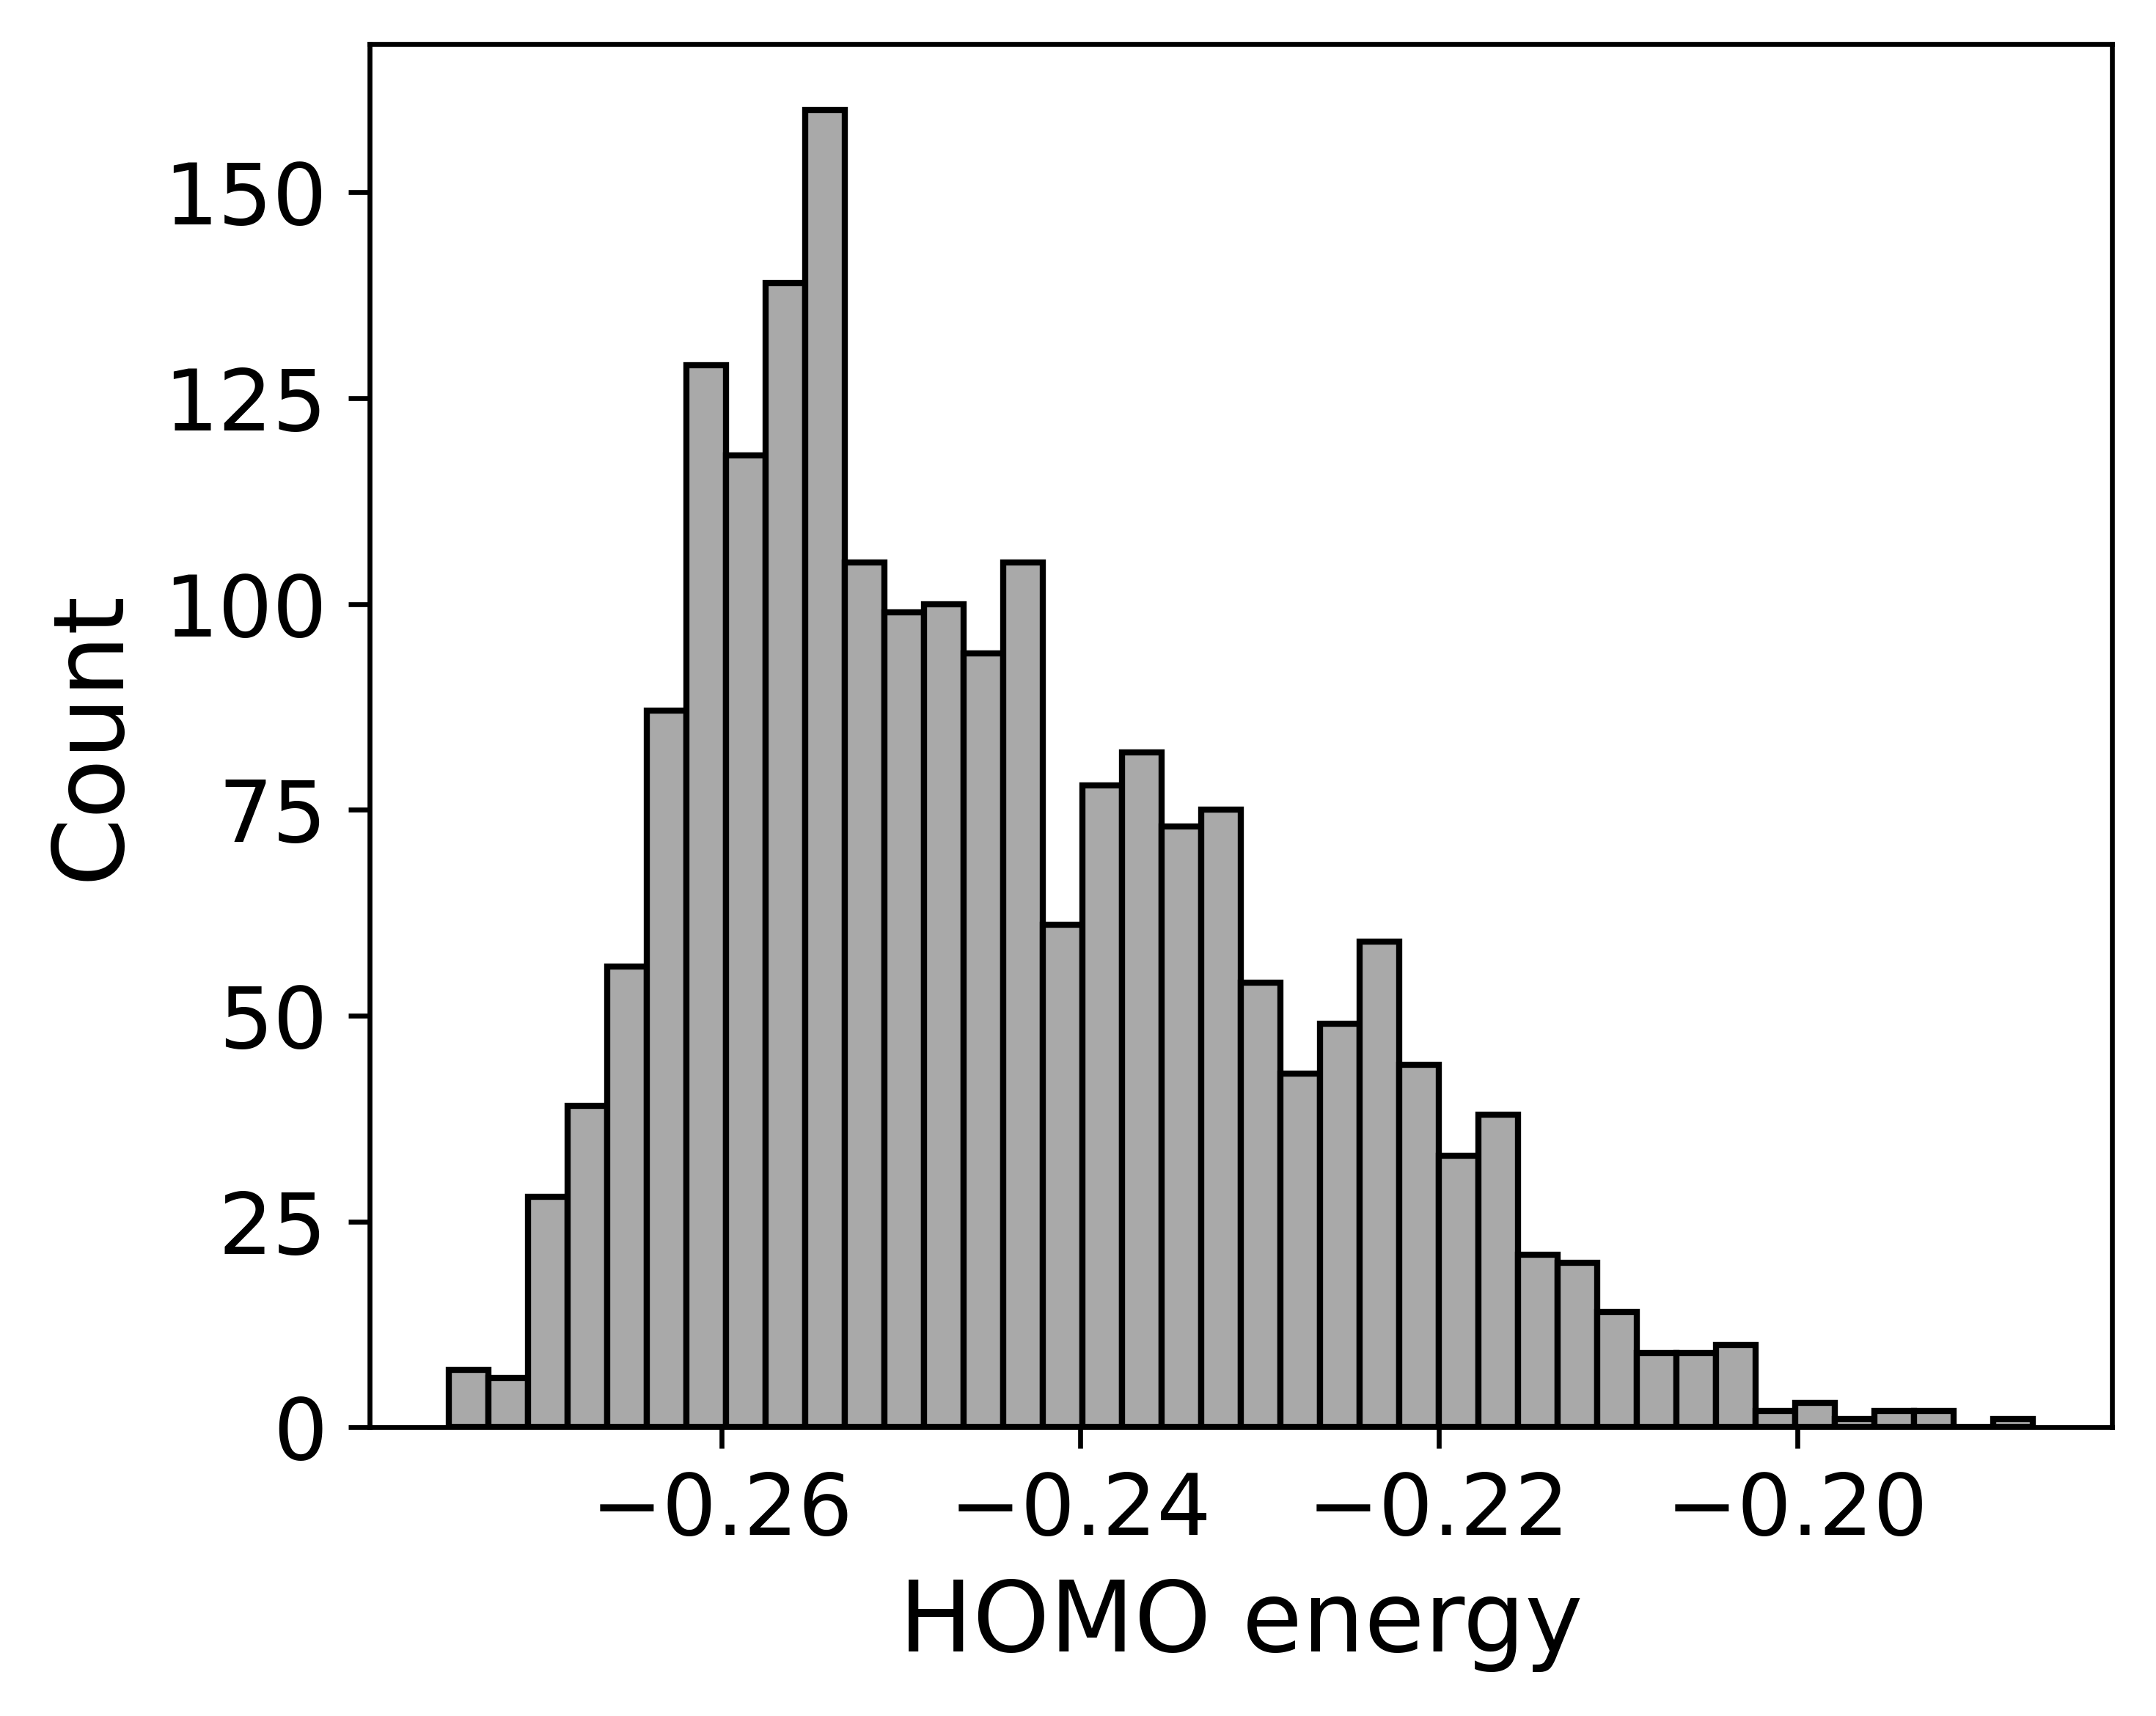

In [6]:
print("Analysis of the HOMO energy on the iodoarenes:")
print("")

print(f'Mean HOMO energy: {round(df_data["homo_energy"].mean(),3)}')
print(f'Median HOMO energy: {round(df_data["homo_energy"].median(),3)}')
print(f'Highest HOMO energy: {round(df_data["homo_energy"].max(),3)}')
print(f'Lowest HOMO energy: {round(df_data["homo_energy"].min(),3)}')
print(f'For reference, the HOMO energy of an electronically neutral idodoarene'\
      f' (1-ethyl-4-iodobenzene) was calculated as {round(df_data.loc["CCC1=CC=CC=C1I","homo_energy"],3)}.')
hist_plot(df_data,"homo_energy","HOMO energy")    
plt.show()

The HOMO energies are shifted towards lower values which correspondes to more electron-poor structures. This trend is consistent with the trend observed for the charge at the ipso-carbon.

## Distribution of steric parameters

In [7]:
nonortho_smarts = Chem.MolFromSmarts("[cH1]1ccc[cH1]c1I")
ortho_smarts = Chem.MolFromSmarts("[c!H1]1ccc[cH1]c1I")
diortho_smarts = Chem.MolFromSmarts("[c!H1]1ccc[c!H1]c1I")

nonortho_mols = [smiles for smiles in df_data.index if Chem.MolFromSmiles(smiles).HasSubstructMatch(nonortho_smarts)]
ortho_mols = [smiles for smiles in df_data.index if Chem.MolFromSmiles(smiles).HasSubstructMatch(ortho_smarts)]
diortho_mols = [smiles for smiles in df_data.index if Chem.MolFromSmiles(smiles).HasSubstructMatch(diortho_smarts)]

Analysis of the buried volume of the ipso-carbon for the iodoarenes:



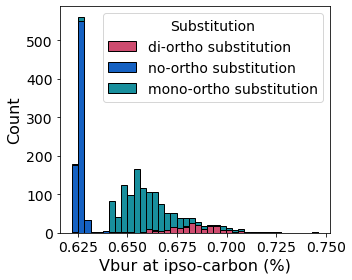

Mean buried volume: 0.649
Median buried volume: 0.65
Highest buried volume: 0.746
Lowest buried volume: 0.622
(Please note that Autoqchem, which was used to featurize the compounds, uses a non-standard definition of
the buried volume that e.g. incorporates the central atom in the Vbur calculation.)

Number of non-ortho substituted substrates: 799
Number of mono-ortho substituted substrates: 1096
Number of di-ortho substituted substrates: 192


In [8]:
df_data.loc[nonortho_mols, "Substitution"] = "no-ortho substitution"
df_data.loc[ortho_mols, "Substitution"] = "mono-ortho substitution"
df_data.loc[diortho_mols, "Substitution"] = "di-ortho substitution"
print("Analysis of the buried volume of the ipso-carbon for the iodoarenes:")
print("")
categories = df_data["Substitution"].value_counts().index.tolist()[::-1]
data_list = [df_data.loc[df_data["Substitution"] == cat, "C1_VBur"] for cat in categories]
plt.figure(figsize=(5, 4))
plt.hist(data_list, stacked=True, label=categories,color=all_colors[:3], bins=40, edgecolor="k")
plt.xlabel("Vbur at ipso-carbon (%)")
plt.ylabel("Count")
plt.legend(title="Substitution")
plt.tight_layout()
plt.show()

print(f'Mean buried volume: {round(df_data["C1_VBur"].mean(),3)}')
print(f'Median buried volume: {round(df_data["C1_VBur"].median(),3)}')
print(f'Highest buried volume: {round(df_data["C1_VBur"].max(),3)}')
print(f'Lowest buried volume: {round(df_data["C1_VBur"].min(),3)}')
print("(Please note that Autoqchem, which was used to featurize the compounds,"\
      " uses a non-standard definition of\nthe buried volume that e.g."\
        " incorporates the central atom in the Vbur calculation.)")
print("")
print(f"Number of non-ortho substituted substrates: {len(nonortho_mols)}")
print(f"Number of mono-ortho substituted substrates: {len(ortho_mols)}")
print(f"Number of di-ortho substituted substrates: {len(diortho_mols)}")


Most substrates are very sterically hindered and have at least one ortho-substituent.

### Analysis of functional groups

In [9]:
print("Counts for functional groups occuring on the same ring as the iodine:")
print("")
for fg in ["[N+](=O)[O-]","F","Cl","Br","[C](F)(F)F","C#N","O[C,c]","OC(=O)","C(=O)","C(=O)O","C(=O)N","[CH1](=O)","[OH1]","[NH2]"]:
    ortho_smarts = Chem.MolFromSmarts(f"c1cccc({fg})c1I")
    ortho_mols = [smiles for smiles in df_data.index if Chem.MolFromSmiles(smiles).HasSubstructMatch(ortho_smarts)]
    meta_smarts = Chem.MolFromSmarts(f"c1ccc({fg})cc1I")
    meta_mols = [smiles for smiles in df_data.index if Chem.MolFromSmiles(smiles).HasSubstructMatch(meta_smarts)]
    para_smarts = Chem.MolFromSmarts(f"c1cc({fg})ccc1I")
    para_mols = [smiles for smiles in df_data.index if Chem.MolFromSmiles(smiles).HasSubstructMatch(para_smarts)]
    print(f"Count for the functional group {fg}: {len(ortho_mols)+len(meta_mols)+len(para_mols)}")



Counts for functional groups occuring on the same ring as the iodine:

Count for the functional group [N+](=O)[O-]: 155
Count for the functional group F: 447
Count for the functional group Cl: 316
Count for the functional group Br: 329
Count for the functional group [C](F)(F)F: 102
Count for the functional group C#N: 95
Count for the functional group O[C,c]: 389
Count for the functional group OC(=O): 6
Count for the functional group C(=O): 634
Count for the functional group C(=O)O: 375
Count for the functional group C(=O)N: 90
Count for the functional group [CH1](=O): 100
Count for the functional group [OH1]: 231
Count for the functional group [NH2]: 260


In [10]:
# [N+](=O)[O-] is a nitro group
# [C](F)(F)F is a trifluoromethyl group
# C#N is a nitrile
# O[C,c] is an ether (aromatic or aliphatic), but it also matches esters (aryl ring attached on the O)
# OC(=O) is an ester attached via the O
# C(=O) is a carbonyl compound (aldehyde, ketone, ester, amide, ...)
# C(=O)O is an ester attached via the carbonyl
# C(=O)N is an amide attached via the carbonyl
# # [C(=O)H1] is an aldehyde
# [OH1] is an hydroxyl group
# [NH2] is a primary amine (in this case aniline)

Print the rate distribution again for the manuscript

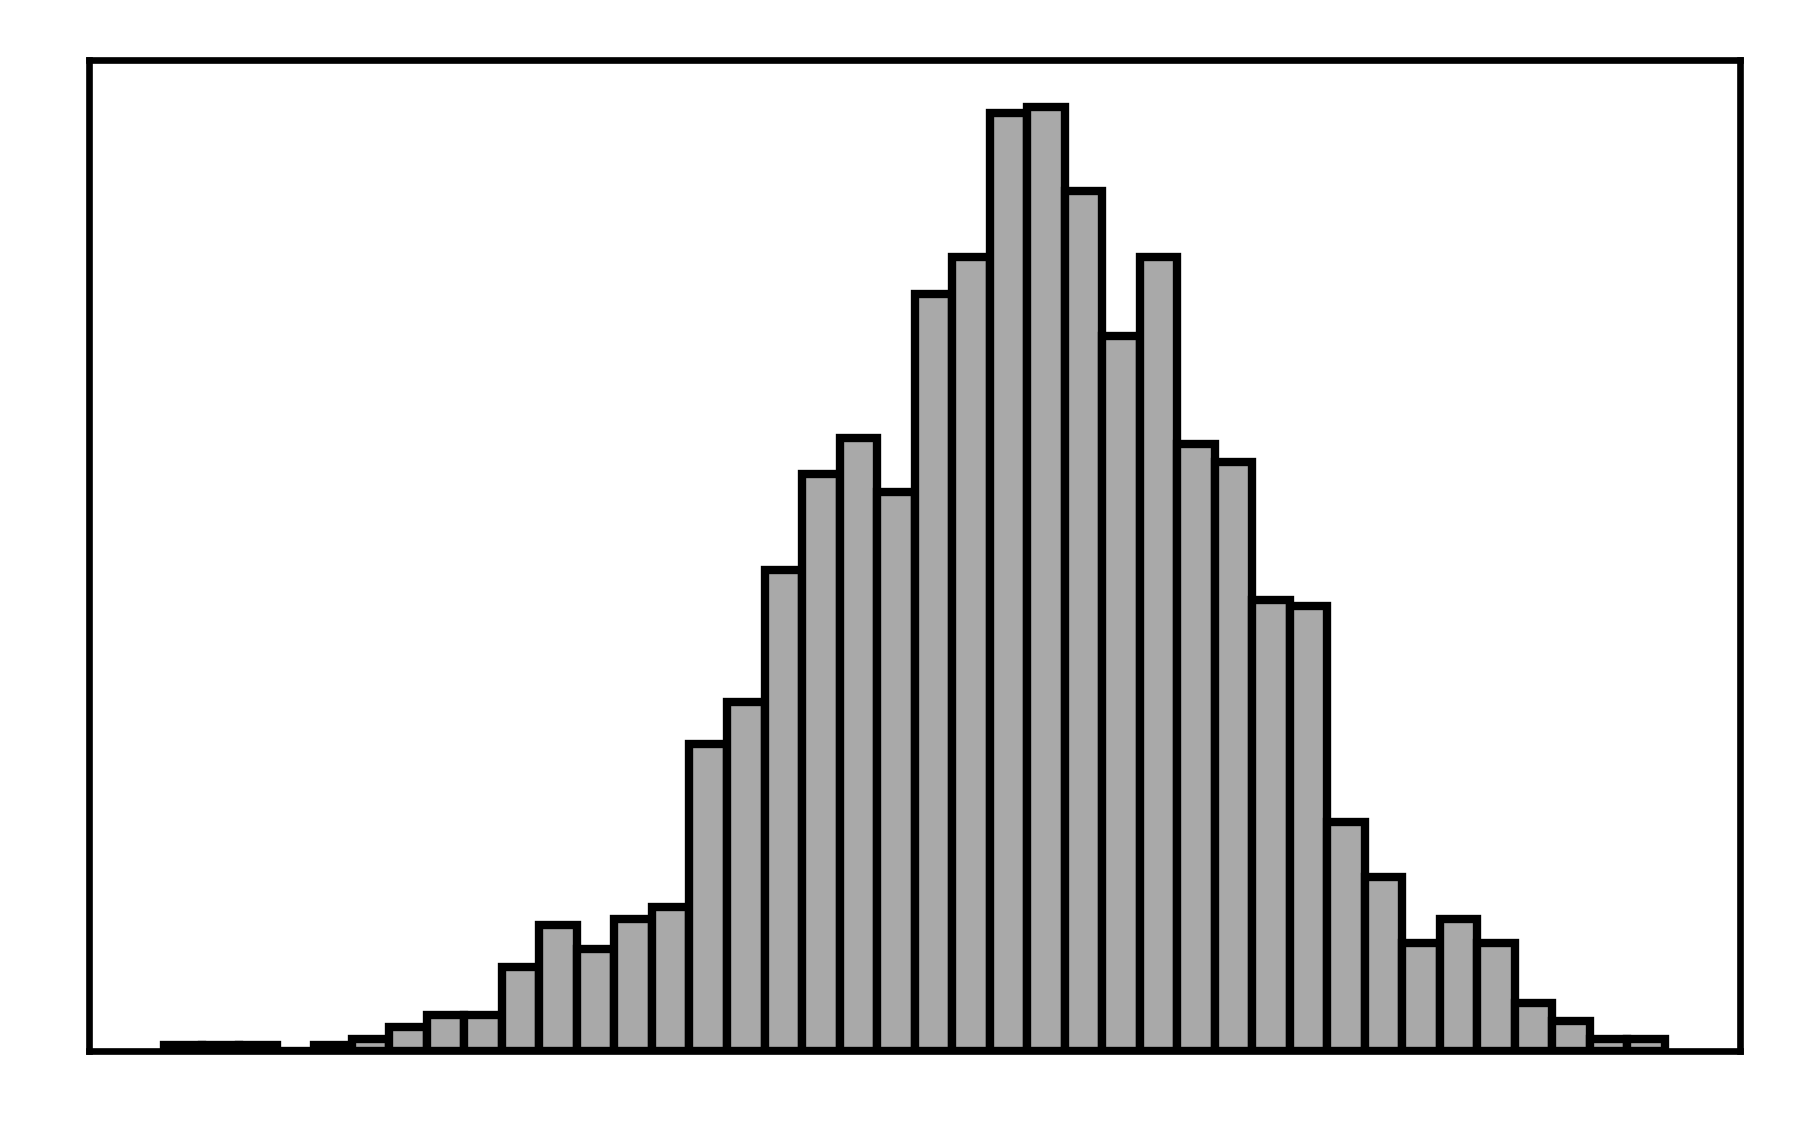

In [11]:
hist_plot(df_data, column = "rate", label = None, print_labels = False, figsize=(3.1,2))